In [25]:
import tensorflow as tf

#load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

#normalize the pixel values
training_images, test_images = training_images / 255.0, test_images / 255.0

In [26]:
#Creating a callback 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    #check accuracy
    accuracy_value = 0.85
    if(logs.get('accuracy') > accuracy_value):

      print(f'\nAccuracy is more than {accuracy_value} so cancelling training.')
      self.model.stop_training = True

callbacks = myCallback()

In [27]:
#Define the model 
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                    ])

#Setup the training parameters 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model 
print(f'\nModel Training:')
model.fit(training_images, training_labels, epochs = 5)

#Evaluate on the test set
print(f'\nModel Evaluation:')
test_loss = model.evaluate(test_images, test_labels)


Model Training:
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4929 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3703 - accuracy: 0.8674
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3352 - accuracy: 0.8796
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3128 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2920 - accuracy: 0.8928

Model Evaluation:
313/313 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8714


In [28]:
#Covolutional Neural Network
#Define the Model 
model = tf.keras.models.Sequential([
                                    
  #add convolutions and max pooling layers first
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  #add Flatten and Dense layers like before 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


#print the model summary
model.summary()

#use same settings as like before 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
print(f'\nModel Training:')

#train convolutional model with callbacks
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

#evaluate on the test set
print(f'\nModel Evaluation:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 128)              

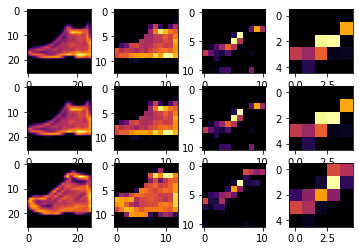

In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 0 
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 5

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f3 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f1 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)